# Preprocessing

In [3]:
# 📦 Importy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

# 📂 Wczytanie danych .npz
data = np.load('data/pathmnist_224.npz')  # <-- podaj właściwą ścieżkę do pliku

# Rozpakowanie danych
train_images = data['train_images']
train_labels = data['train_labels']
# val_images = data['val_images']
# val_labels = data['val_labels']
# test_images = data['test_images']
# test_labels = data['test_labels']

print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")


Train images shape: (89996, 224, 224, 3)
Train labels shape: (89996, 1)


In [4]:
# ⚡ Przygotowanie tf.data.Dataset z normalizacją i batchowaniem

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.map(lambda x, y: (tf.cast(x, tf.float64) / 255.0, y))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(64)

In [5]:
all_labels = []

# Iterujemy po wszystkich batchach w train_dataset
for batch_imgs, batch_lbls in train_dataset:
    batch_labels_np = batch_lbls.numpy().flatten()  # konwertuj batch do numpy i spłaszcz
    all_labels.extend(batch_labels_np)  # dodaj do listy

2025-04-27 14:52:36.788088: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [6]:
# # 🧮 Stworzenie DataFrame z etykietami

df_batch = pd.DataFrame({
    'index': np.arange(batch_labels_np.shape[0]),
    'label': batch_labels_np
})

# Podgląd tabeli
df_batch.head()

# Stwórz DataFrame dla całego zbioru treningowego
df_all = pd.DataFrame({
    'index': np.arange(len(all_labels)),
    'label': all_labels
})

# Podgląd
df_all.head()


,index,label
0,0,5
1,1,0
2,2,0
3,3,1
4,4,5


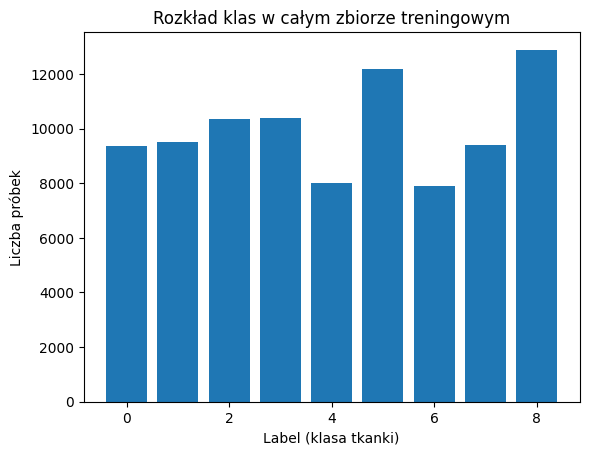

label
0     9366
1     9509
2    10360
3    10401
4     8006
5    12182
6     7886
7     9401
8    12885
Name: count, dtype: int64


In [7]:
# Rozkład klas w całym zbiorze
label_counts_all = df_all['label'].value_counts().sort_index()

plt.bar(label_counts_all.index, label_counts_all.values)
plt.xlabel('Label (klasa tkanki)')
plt.ylabel('Liczba próbek')
plt.title('Rozkład klas w całym zbiorze treningowym')
plt.show()

print(label_counts_all)

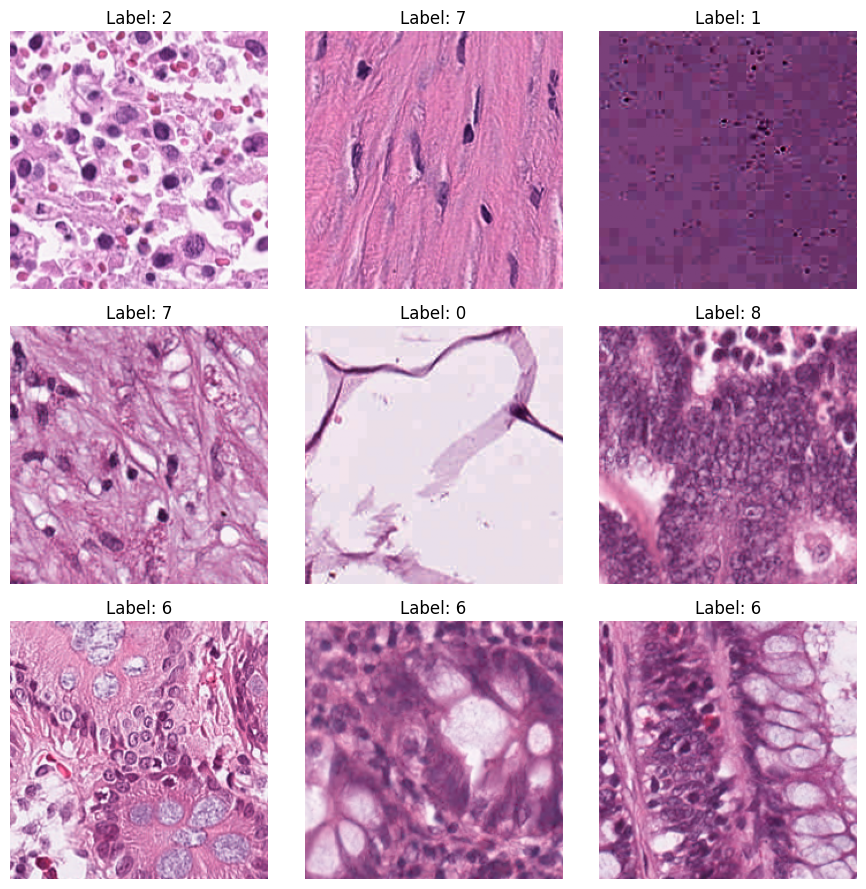

In [11]:
# 🖼️ Wyświetlenie przykładowych obrazków z batcha

fig, axes = plt.subplots(3, 3, figsize=(9, 9))

for i, ax in enumerate(axes.flat):
    ax.imshow(batch_imgs[i].numpy())  # Tensor -> numpy array
    ax.set_title(f"Label: {batch_labels_np[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
